# Data Collection and Processing

In [30]:
# pre-load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.graph_objs as go
import seaborn as sns

In [2]:
# load the data

df = pd.read_csv('googleplaystore.csv')
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# list all columns

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
# Rename columns to ensure better usage and readability

df.columns = ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Version',
       'Android_Version']

In [5]:
# Show renamed columns

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Version',
       'Android_Version'],
      dtype='object')

In [6]:
# Find total number of rows and columns in the original DF

print('Number of Rows: ', len(df.index))
print('Number of Columns: ', len(df.columns))

Number of Rows:  10841
Number of Columns:  13


In [7]:
# Find nulls in all columns

df.isnull().sum()

App                   0
Category              0
Rating             1474
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content_Rating        1
Genres                0
Last_Updated          0
Current_Version       8
Android_Version       3
dtype: int64

In [8]:
# Dropping nulls 

df.dropna(axis=0, inplace = True)
df.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content_Rating     0
Genres             0
Last_Updated       0
Current_Version    0
Android_Version    0
dtype: int64

In [9]:
# Remove the '$' and ',' characters from the df['Price'] feature

df.Price.replace('\$|\,', '', regex=True, inplace = True)

In [10]:
df[df['Type'] == 'Paid'].Price

234       4.99
235       4.99
290       4.99
291       4.99
427       3.99
         ...  
10690     0.99
10697     0.99
10760     7.99
10782    16.99
10785     1.20
Name: Price, Length: 645, dtype: object

In [11]:
# Remove the '+' and ',' characters from the df['Installs'] feature

df.Installs.replace('\+|\,', '', regex=True, inplace = True)

In [12]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: object

In [13]:
df.dtypes

App                 object
Category            object
Rating             float64
Reviews             object
Size                object
Installs            object
Type                object
Price               object
Content_Rating      object
Genres              object
Last_Updated        object
Current_Version     object
Android_Version     object
dtype: object

In [14]:
df = df.astype({"Price": float, "Installs": int})

In [15]:
df.dtypes

App                 object
Category            object
Rating             float64
Reviews             object
Size                object
Installs             int64
Type                object
Price              float64
Content_Rating      object
Genres              object
Last_Updated        object
Current_Version     object
Android_Version     object
dtype: object

In [16]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
# Final number of rows and columns of pre-processed data

print('Number of Rows: ', len(df.index))
print('Number of Columns: ', len(df.columns))

Number of Rows:  9360
Number of Columns:  13


In [18]:
df.head(n = 5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Exploration & Visualization

### 1) Finding the top 5 installation numbers based on app categories 

In [33]:
#Group by category and order by sum of installs

df_install_byCat = df.groupby(by='Category').sum().sort_values(by = 'Installs', ascending = False).head(n = 5)

df_install_byCat

,Rating,Installs,Price
Category,,,
GAME,4702.1,35085862717,280.36
COMMUNICATION,1364.0,32647241530,56.69
PRODUCTIVITY,1478.2,14176070180,70.92
SOCIAL,1102.2,14069841475,1.98
TOOLS,2966.6,11450224500,207.90


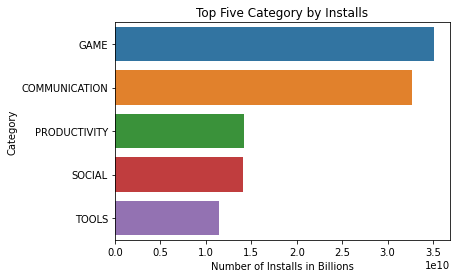

In [41]:
sns.barplot(data = df_install_byCat, x = 'Installs', y = df_install_byCat.index, orient='h')
plt.title('Top Five Category by Installs')
plt.xlabel('Number of Installs in Billions')
plt.ylabel('Category')
plt.show()

This proves that most apps downloaded on the Google app store are either Games or Communication based. This makes sense because communication services like Whatsapp and Messenger are vital; Games are downloaded to play.

### 2) Highest rated apps based on number of installs (top 5)

In [44]:
#df_rating_byInstalls = 
df.sort_values(by = ['Installs', 'Rating'], ascending = False).head(n = 5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Version,Android_Version
1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1700,Subway Surfers,GAME,4.5,27723193,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1750,Subway Surfers,GAME,4.5,27724094,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1872,Subway Surfers,GAME,4.5,27725352,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1917,Subway Surfers,GAME,4.5,27725352,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
